In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import re

from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

import warnings 
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/language classification/Language Detection.csv")
data.head() 

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
data.shape

(10337, 2)

In [ ]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [ ]:
data.duplicated().sum()

66

In [ ]:
data.drop_duplicates(inplace=True) 

In [ ]:
data.shape

(10271, 2)

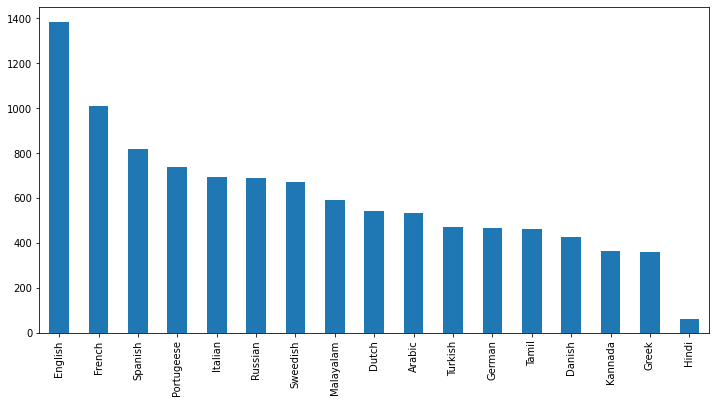

In [ ]:
plt.figure(figsize=(12, 6))
data['Language'].value_counts().plot(kind='bar')

In [ ]:
X = data['Text']
y = data['Language'] 

In [ ]:
le = LabelEncoder() 
y = le.fit_transform(y)

In [ ]:
def cleaning_preprocessing_text(text):
    data_list = []
    # iterating through all the text
    for text in X:         
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      
        text = re.sub(r'[[]]', ' ', text)   
        text = text.lower()          
        data_list.append(text)   
        
    return data_list 
data_clean = cleaning_preprocessing_text(X)

In [ ]:
cv = CountVectorizer() 
X = cv.fit_transform(data_clean).toarray() 
X.shape

(10271, 34937)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1, stratify=y) 
print("Shape of x_train: {} \nShape of x_test: {} \nShape of y_train: {} \nShape of y_test: {}".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Shape of x_train: (9243, 34937) 
Shape of x_test: (1028, 34937) 
Shape of y_train: (9243,) 
Shape of y_test: (1028,)


In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
ac = accuracy_score(y_test, y_pred)
print("Accuracy Score is: {}".format(ac))

Accuracy Score is: 0.980544747081712


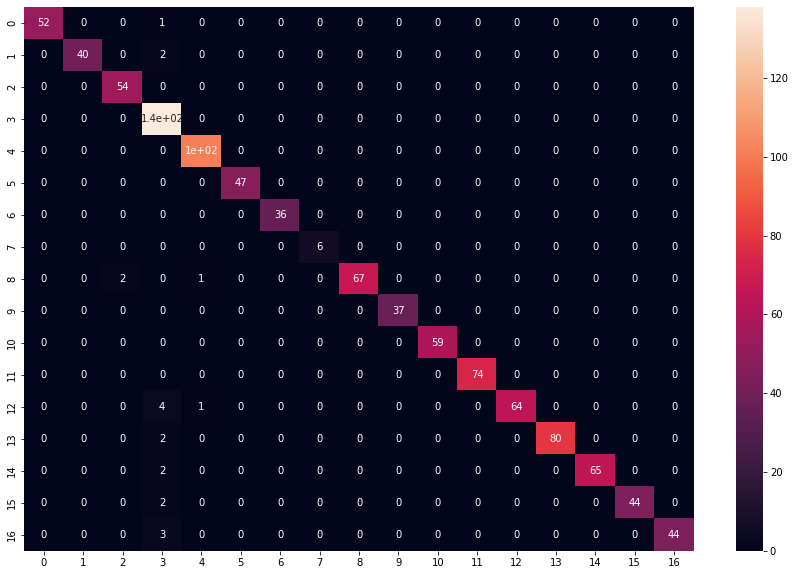

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [ ]:
def predict_language(txt): 
    #t = cleaning_preprocessing_text(txt) 
    x = cv.transform([txt]).toarray() 
    lang = model.predict(x)
    lang = le.inverse_transform(lang) 
    print("The name of the language is :{}".format(lang[0]))

In [ ]:
# English Language 
text = "English is an International Language"
predict_language(text) 

The name of the language is :English


In [ ]:
# French Language 
text = "Analytics Vidhya fournit un portail de connaissances basé sur la communauté pour les professionnels de l'analyse et de la science des données" 
predict_language(text) 

The name of the language is :French


In [ ]:
# Arabic Language 
text = "توفر Analytics Vidhya بوابة معرفية قائمة على المجتمع لمحترفي التحليلات وعلوم البيانات" 
predict_language(text) 

The name of the language is :Arabic


In [ ]:
# Spanish Language 
text = "Analytics Vidhya proporciona un portal de conocimiento basado en la comunidad para profesionales de Analytics y Data Science." 
predict_language(text) 

The name of the language is :Spanish


In [ ]:
# Malaysian Language 
text = "അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു" 
predict_language(text) 

The name of the language is :Malayalam


In [ ]:
# Russian Language 
text = "Analytics Vidhya - это портал знаний на базе сообщества для профессионалов в области аналитики и данных." 
predict_language(text) 

The name of the language is :Russian
